<a href="https://colab.research.google.com/github/Ericknht/PracticalFoundationAI/blob/main/Red_Neuronal_con_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Documentación: https://www.tensorflow.org/tutorials/keras/classification
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
test_images.shape

(10000, 28, 28)

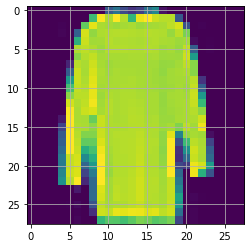

In [ ]:
plt.figure()
plt.imshow(train_images[350])
plt.grid(True)

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

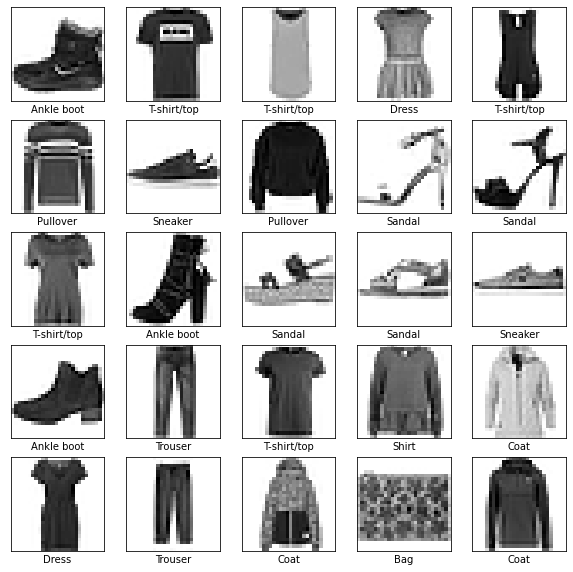

In [ ]:
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

In [ ]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation=tf.nn.relu),
                          keras.layers.Dense(10, activation=tf.nn.softmax)
                          
])

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# epochs: número de iteraciones
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6392 - accuracy: 0.7808
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3852 - accuracy: 0.8631
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3383 - accuracy: 0.8767
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3140 - accuracy: 0.8873
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2965 - accuracy: 0.8902


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3690 - accuracy: 0.8674
Accuracy 0.8673999905586243


In [ ]:
predictions = model.predict(test_images)
np.argmax(predictions[0])

9

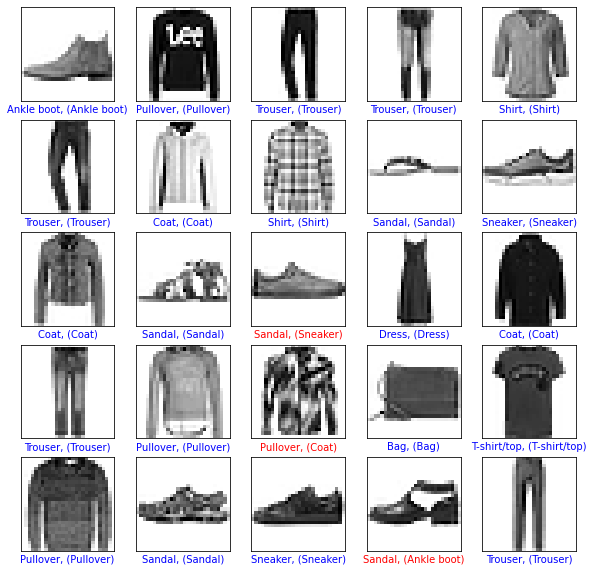

In [ ]:
plt.figure(figsize= (10, 10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel(f'{class_names[predicted_label]}, ({class_names[true_label]})', color=color)